# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [9]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)

In [11]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [12]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [13]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [86]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [87]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [88]:
precision = tp / (tp + fp)
precision

0.5681233933161953

### Используем готовые библиотеки

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [18]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )
disp = plot_precision_recall_curve(model, X_test, Y_test
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

SyntaxError: invalid syntax (<ipython-input-18-b7dda257065e>, line 3)

In [19]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

NameError: name 'pr' is not defined

In [20]:
from sklearn.metrics import average_precision_score

In [21]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

### ROC

In [22]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [23]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [24]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9445589136029695)
(0.0, 0.0017035775127768314, 0.9445589136029696)
(0.0, 0.017035775127768313, 0.8789939377792317)
(0.0007558578987150416, 0.017035775127768313, 0.8786478779112944)
(0.0007558578987150416, 0.028960817717206135, 0.8743556662464672)
(0.0022675736961451248, 0.028960817717206135, 0.8701673271799358)
(0.0022675736961451248, 0.034071550255536626, 0.866820140264318)
(0.003779289493575208, 0.034071550255536626, 0.8579621220526474)
(0.003779289493575208, 0.03577512776831346, 0.8557638745365836)
(0.0045351473922902496, 0.03577512776831346, 0.8523294480917275)
(0.0045351473922902496, 0.03747870528109029, 0.8505415403317492)
(0.006046863189720333, 0.03747870528109029, 0.8373703328383985)
(0.006046863189720333, 0.049403747870528106, 0.8283556865417957)
(0.006802721088435374, 0.049403747870528106, 0.8272570832978605)
(0.006802721088435374, 0.05281090289608177, 0.8244237816629214)
(0.007558578987150416, 0.05281090289608177, 0.8228902848542047)
(0.007558578987150416, 0.054

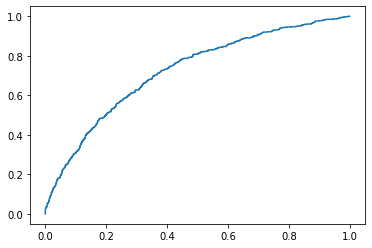

In [25]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [26]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [27]:
model2 = LogisticRegression()

In [28]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [29]:
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions2 = model2.predict_proba( X_test_short )

In [31]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

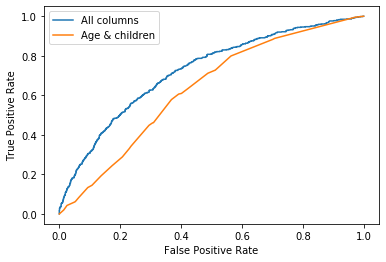

In [32]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [33]:
from sklearn.metrics import roc_curve

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141550167462996

In [36]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [37]:
from sklearn.metrics import auc

In [38]:
auc( fpr, tpr )

0.7225943566902437

In [39]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [40]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [41]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [42]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [43]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

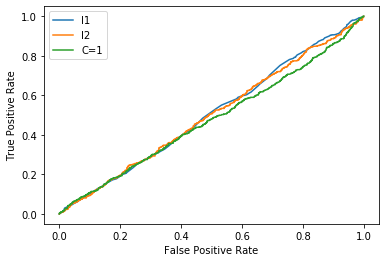

In [44]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [45]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [46]:
Y = data['affair']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [48]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [49]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [50]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

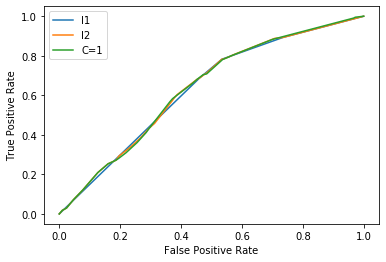

In [51]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

Домашнее задание

In [52]:
# Построим набор моделей: 
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
# Выведем score: 
    print("{}: {}".format(i, model.score(X_test, Y_test)))
    

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


Text(0.5, 1.0, '2-class Precision-Recall curve: AP={0:0.2f}')

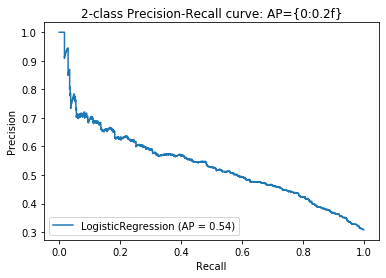

In [53]:
# Построим график precision\recall
disp = plot_precision_recall_curve(model, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')

In [168]:
# Посчитаем tpr\fpr вручную:
fpr = []
tpr = []
thr = []
tp = 0
fp = 0
tn = 0
fn = 0 

predictions = model.predict_proba( X_test )
threshold = 0.01

for i in range(99):
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr.append(tp/(tp+fn))
    fpr.append(fp/(fp+tn))
    thr.append(threshold)
    threshold += 0.01

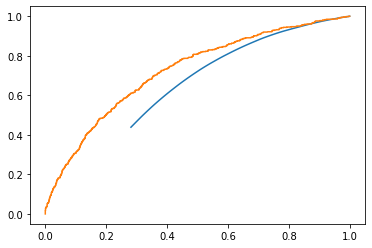

In [171]:
fpr_emb, tpr_emb, thres = roc_curve( Y_test, predictions[:, 1] )

plt.plot( fpr, tpr )
plt.plot(fpr_emb, tpr_emb)

Не понимаю почему, но кривая построенная вручную и встроенная всё-таки отличаются. 
МОжет, это нормально, может нет. Ещё странно что вручную построенная не идёт до конца. 